In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:

# Load data

# Load precomputed feature matrix
X = pd.read_csv("./VMMR_subset_images/train_features.csv", header=None).values

# Load labels (assumes format like: label, filename)
df_labels = pd.read_csv("./VMMR_subset_images/train_data.csv", header=None, names=["label", "filename"])

# X_train = pd.read_csv(X_train_path)
# y_train = pd.read_csv(y_train_path).values.ravel()

# X_train = X_train.values




In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df_labels["label"])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8000

Classification Report:
                               precision    recall  f1-score   support

   chevrolet_impala_2004-2005       0.79      0.79      0.79       107
dodge_grand caravan_2005-2006       0.85      0.85      0.85        96
      ford_explorer_2001-2002       0.91      0.92      0.92       113
       ford_mustang_2000-2001       0.80      0.87      0.84       102
        ford_taurus_2002-2003       0.87      0.86      0.87        88
       honda_accord_2005-2006       0.57      0.66      0.61        90
      honda_odyssey_2005-2006       0.82      0.84      0.83        89
      nissan_altima_2005-2006       0.83      0.81      0.82       106
       toyota_camry_2002-2003       0.73      0.68      0.70       100
   volkswagen_jetta_2002-2003       0.83      0.70      0.76       109

                     accuracy                           0.80      1000
                    macro avg       0.80      0.80      0.80      1000
                 weighted avg    


Running Cross-Validation...


Scaler: No Preprocessing
Layers: (50,), Alpha: 0.0001, LR: 0.001 --> Train Acc: 0.8422, Val Acc: 0.7275
Layers: (50,), Alpha: 0.0001, LR: 0.01 --> Train Acc: 0.5365, Val Acc: 0.4693
Layers: (50,), Alpha: 0.001, LR: 0.001 --> Train Acc: 0.8565, Val Acc: 0.7352
Layers: (50,), Alpha: 0.001, LR: 0.01 --> Train Acc: 0.5927, Val Acc: 0.5115
Layers: (50,), Alpha: 0.01, LR: 0.001 --> Train Acc: 0.8451, Val Acc: 0.7315
Layers: (50,), Alpha: 0.01, LR: 0.01 --> Train Acc: 0.5257, Val Acc: 0.4467
Layers: (100,), Alpha: 0.0001, LR: 0.001 --> Train Acc: 0.8912, Val Acc: 0.7578
Layers: (100,), Alpha: 0.0001, LR: 0.01 --> Train Acc: 0.7498, Val Acc: 0.6392
Layers: (100,), Alpha: 0.001, LR: 0.001 --> Train Acc: 0.8798, Val Acc: 0.7542
Layers: (100,), Alpha: 0.001, LR: 0.01 --> Train Acc: 0.7562, Val Acc: 0.6418
Layers: (100,), Alpha: 0.01, LR: 0.001 --> Train Acc: 0.8567, Val Acc: 0.7422
Layers: (100,), Alpha: 0.01, LR: 0.01 --> Train Acc: 0.7627, Val Acc: 0.6528
Layers: 

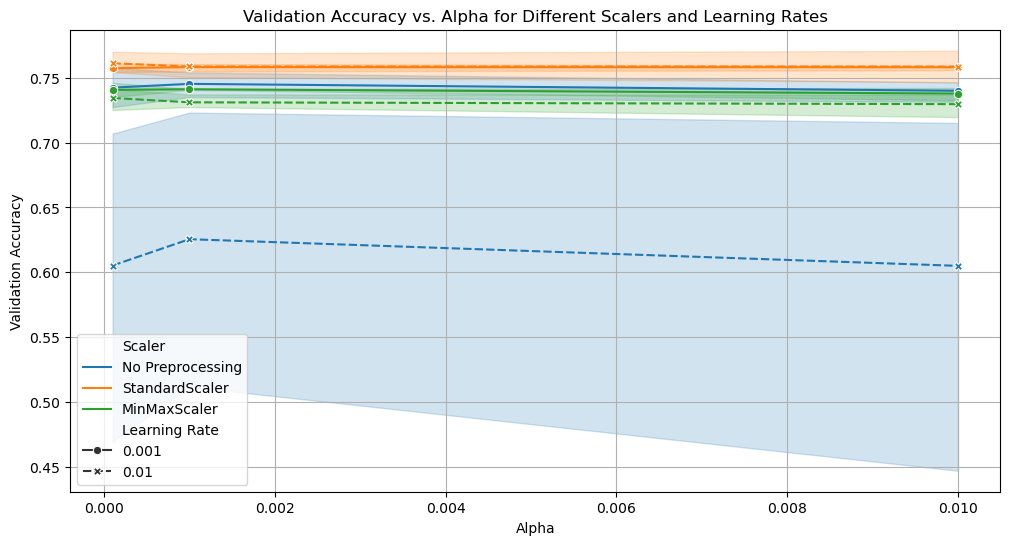


🔍 Best Parameters:
Scaler: StandardScaler, Layers: (100,), Alpha: 0.01, LR: 0.01
✅ Best Validation Accuracy: 0.7710

🏋️ Final Train Accuracy: 0.9792
🧪 Final Test Accuracy: 0.8060

📊 Classification Report:
                               precision    recall  f1-score   support

   chevrolet_impala_2004-2005       0.78      0.79      0.79       100
dodge_grand caravan_2005-2006       0.91      0.86      0.89       100
      ford_explorer_2001-2002       0.92      0.90      0.91       100
       ford_mustang_2000-2001       0.81      0.84      0.82       100
        ford_taurus_2002-2003       0.87      0.78      0.82       100
       honda_accord_2005-2006       0.65      0.66      0.66       100
      honda_odyssey_2005-2006       0.82      0.93      0.87       100
      nissan_altima_2005-2006       0.74      0.83      0.78       100
       toyota_camry_2002-2003       0.76      0.71      0.74       100
   volkswagen_jetta_2002-2003       0.82      0.76      0.79       100

           

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
X = pd.read_csv("./VMMR_subset_images/train_features.csv", header=None).values
df_labels = pd.read_csv("./VMMR_subset_images/train_data.csv", header=None, names=["label", "filename"])

# Encode class labels
le = LabelEncoder()
y = le.fit_transform(df_labels["label"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scalers and hyperparameters
scalers = {
    "No Preprocessing": None,
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}
hidden_layer_sizes = [(50,), (100,), (100, 50)]
alphas = [0.0001, 0.001, 0.01]
learning_rates = [0.001, 0.01]
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

best_score = 0
best_model = None
best_scaler = None
best_params = None
results = []

# Cross-validation
print("\nRunning Cross-Validation...\n")
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    for hls in hidden_layer_sizes:
        for alpha in alphas:
            for lr in learning_rates:
                val_scores = []
                train_scores = []

                for train_idx, val_idx in skf.split(X_train, y_train):
                    X_tr, X_val = X_train[train_idx], X_train[val_idx]
                    y_tr, y_val = y_train[train_idx], y_train[val_idx]

                    if scaler:
                        fitted_scaler = scaler.fit(X_tr)
                        X_tr = fitted_scaler.transform(X_tr)
                        X_val = fitted_scaler.transform(X_val)

                    clf = MLPClassifier(hidden_layer_sizes=hls, alpha=alpha,
                                        learning_rate_init=lr, max_iter=1000,
                                        early_stopping=True, random_state=42)
                    clf.fit(X_tr, y_tr)

                    train_scores.append(clf.score(X_tr, y_tr))
                    val_scores.append(clf.score(X_val, y_val))

                mean_val = np.mean(val_scores)
                mean_train = np.mean(train_scores)

                results.append({
                    'Scaler': scaler_name,
                    'Layers': hls,
                    'Alpha': alpha,
                    'Learning Rate': lr,
                    'Train Accuracy': mean_train,
                    'Validation Accuracy': mean_val
                })

                print(f"Layers: {hls}, Alpha: {alpha}, LR: {lr} --> Train Acc: {mean_train:.4f}, Val Acc: {mean_val:.4f}")

                if mean_val > best_score:
                    best_score = mean_val
                    best_model = clf
                    best_scaler = scaler.fit(X_train) if scaler else None
                    best_params = (scaler_name, hls, alpha, lr)

# Visualize
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.lineplot(data=results_df, x="Alpha", y="Validation Accuracy", hue="Scaler", style="Learning Rate", markers=True)
plt.title("Validation Accuracy vs. Alpha for Different Scalers and Learning Rates")
plt.grid(True)
plt.show()

# Final Training and Evaluation
print("\n🔍 Best Parameters:")
print(f"Scaler: {best_params[0]}, Layers: {best_params[1]}, Alpha: {best_params[2]}, LR: {best_params[3]}")
print(f"Best Validation Accuracy: {best_score:.4f}")

X_train_final = best_scaler.transform(X_train) if best_scaler else X_train
X_test_final = best_scaler.transform(X_test) if best_scaler else X_test

final_model = MLPClassifier(hidden_layer_sizes=best_params[1],
                            alpha=best_params[2],
                            learning_rate_init=best_params[3],
                            max_iter=1000, early_stopping=True, random_state=42)
final_model.fit(X_train_final, y_train)

# Final results
train_acc = final_model.score(X_train_final, y_train)
test_acc = final_model.score(X_test_final, y_test)

print(f"\nFinal Train Accuracy: {train_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, final_model.predict(X_test_final), target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, final_model.predict(X_test_final)))
